In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Стиль графиков
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [82]:
# Загрузка Restaurant Reviews
reviews = pd.read_csv("Restaurant_Reviews.csv", sep='\t')
print("Restaurant Reviews загружен")
print(reviews.shape)
reviews.head()

Restaurant Reviews загружен
(1000, 2)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [83]:
# Загрузка NY Pricing
ny = pd.read_csv("NY Realstate Pricing.csv")
print("\nNY Realstate Pricing загружен")
print(ny.shape)
ny.head()


NY Realstate Pricing загружен
(17614, 12)


,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [84]:
print("Restaurant Reviews — распределение классов:")
print(reviews['Liked'].value_counts())

print("\nNY Pricing — статистика цены:")
ny['price'].describe()

Restaurant Reviews — распределение классов:
Liked
1    500
0    500
Name: count, dtype: int64

NY Pricing — статистика цены:


count    17614.000000
mean       145.455490
std        194.990677
min          0.000000
25%         70.000000
50%        109.000000
75%        170.000000
max       9999.000000
Name: price, dtype: float64

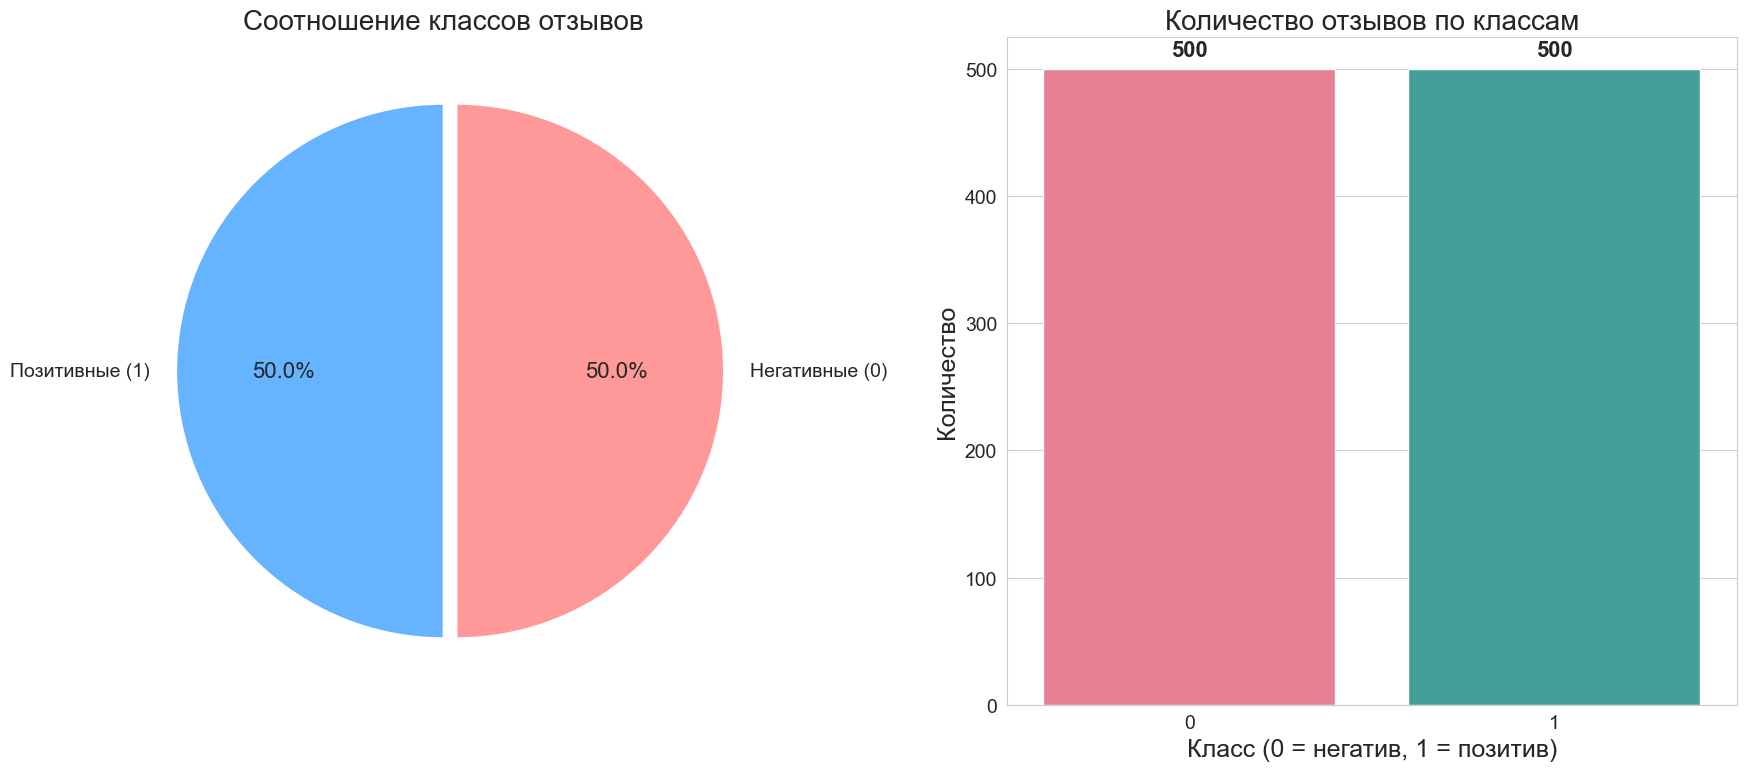

Позитивных отзывов: 500 (50.0%)
Негативных отзывов: 500 (50.0%)


In [85]:
# Круговая + столбчатая диаграмма распределения классов в Restaurant Reviews
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

likes_count = reviews['Liked'].value_counts()
axes[0].pie(likes_count.values, labels=['Позитивные (1)', 'Негативные (0)'], 
            autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], explode=(0, 0.05))
axes[0].set_title('Соотношение классов отзывов')

sns.countplot(data=reviews, x='Liked', ax=axes[1], palette='husl')
axes[1].set_title('Количество отзывов по классам')
axes[1].set_xlabel('Класс (0 = негатив, 1 = позитив)')
axes[1].set_ylabel('Количество')
for i, v in enumerate(likes_count.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Позитивных отзывов: {likes_count[1]} ({likes_count[1]/len(reviews)*100:.1f}%)")
print(f"Негативных отзывов: {likes_count[0]} ({likes_count[0]/len(reviews)*100:.1f}%)")

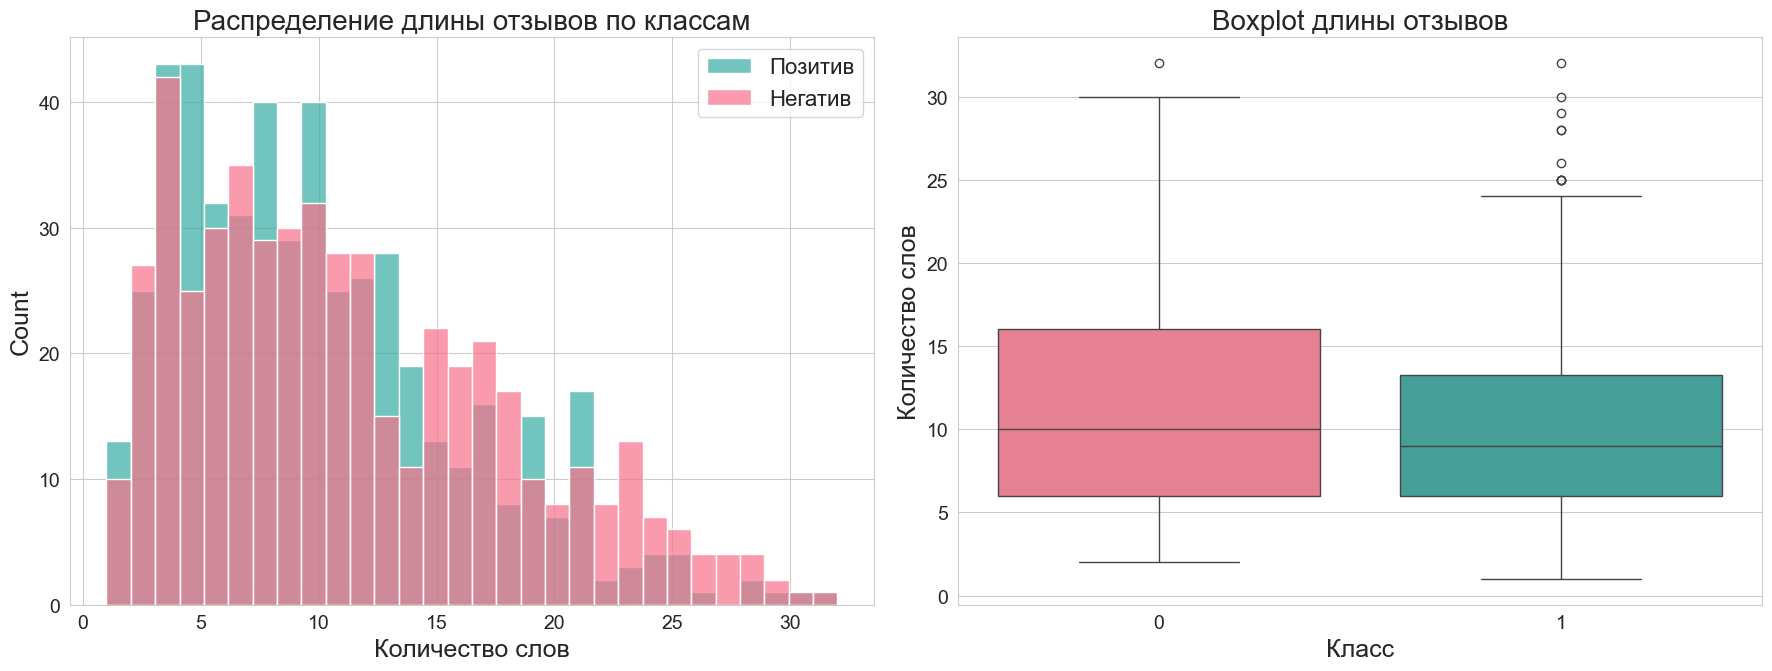

Средняя длина отзыва:
Liked
0    11.498
1    10.290
Name: length, dtype: float64


In [86]:
# Добавляем длину текста
reviews['length'] = reviews['Review'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Гистограмма длин
sns.histplot(data=reviews, x='length', hue='Liked', palette='husl', bins=30, ax=axes[0], alpha=0.7)
axes[0].set_title('Распределение длины отзывов по классам')
axes[0].set_xlabel('Количество слов')
axes[0].legend(['Позитив', 'Негатив'])

# Boxplot
sns.boxplot(data=reviews, x='Liked', y='length', palette='husl', ax=axes[1])
axes[1].set_title('Boxplot длины отзывов')
axes[1].set_xlabel('Класс')
axes[1].set_ylabel('Количество слов')

plt.tight_layout()
plt.show()

print("Средняя длина отзыва:")
print(reviews.groupby('Liked')['length'].mean())

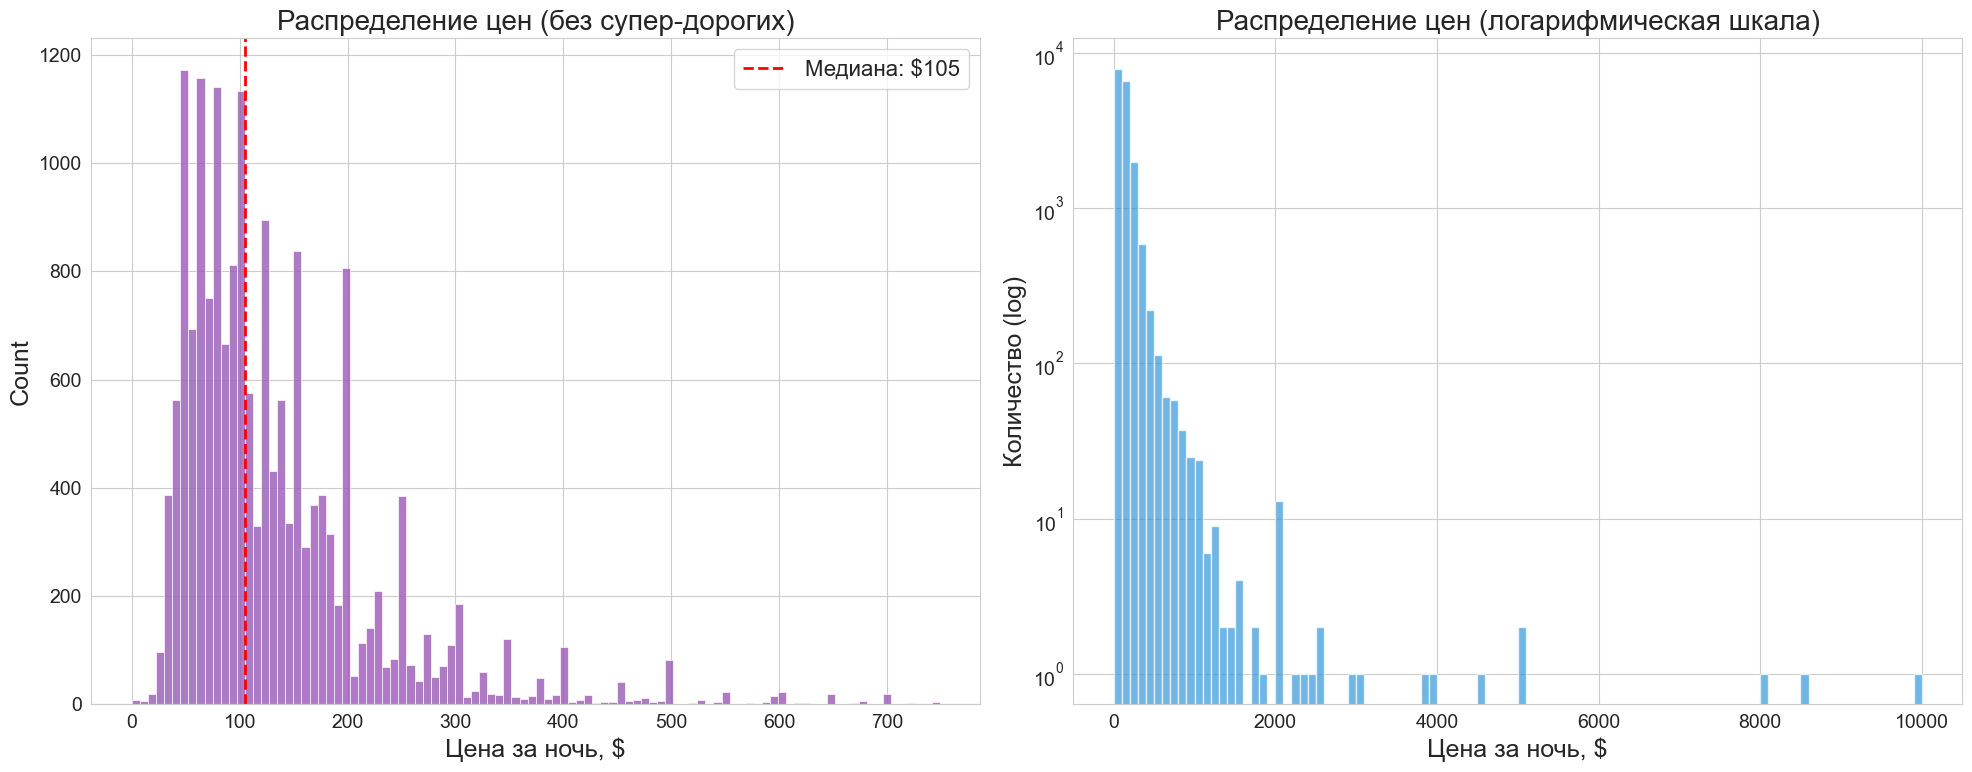

Средняя цена: $145.46
Медианная цена: $109.00
Макс цена: $9999.00
99% квантиль: $750.00


In [87]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Обычная гистограмма (с обрезкой выбросов)
ny_filtered = ny[ny['price'] < ny['price'].quantile(0.99)]  # убираем топ-1%
sns.histplot(ny_filtered['price'], bins=100, ax=axes[0], color='#9b59b6', alpha=0.8)
axes[0].set_title('Распределение цен (без супер-дорогих)')
axes[0].set_xlabel('Цена за ночь, $')
axes[0].axvline(ny_filtered['price'].median(), color='red', linestyle='--', linewidth=2, label=f"Медиана: ${ny_filtered['price'].median():.0f}")
axes[0].legend()

# Логарифмическая шкала
axes[1].hist(ny['price'], bins=100, color='#3498db', alpha=0.7, log=True)
axes[1].set_title('Распределение цен (логарифмическая шкала)')
axes[1].set_xlabel('Цена за ночь, $')
axes[1].set_ylabel('Количество (log)')

plt.tight_layout()
plt.show()

print(f"Средняя цена: ${ny['price'].mean():.2f}")
print(f"Медианная цена: ${ny['price'].median():.2f}")
print(f"Макс цена: ${ny['price'].max():.2f}")
print(f"99% квантиль: ${ny['price'].quantile(0.99):.2f}")

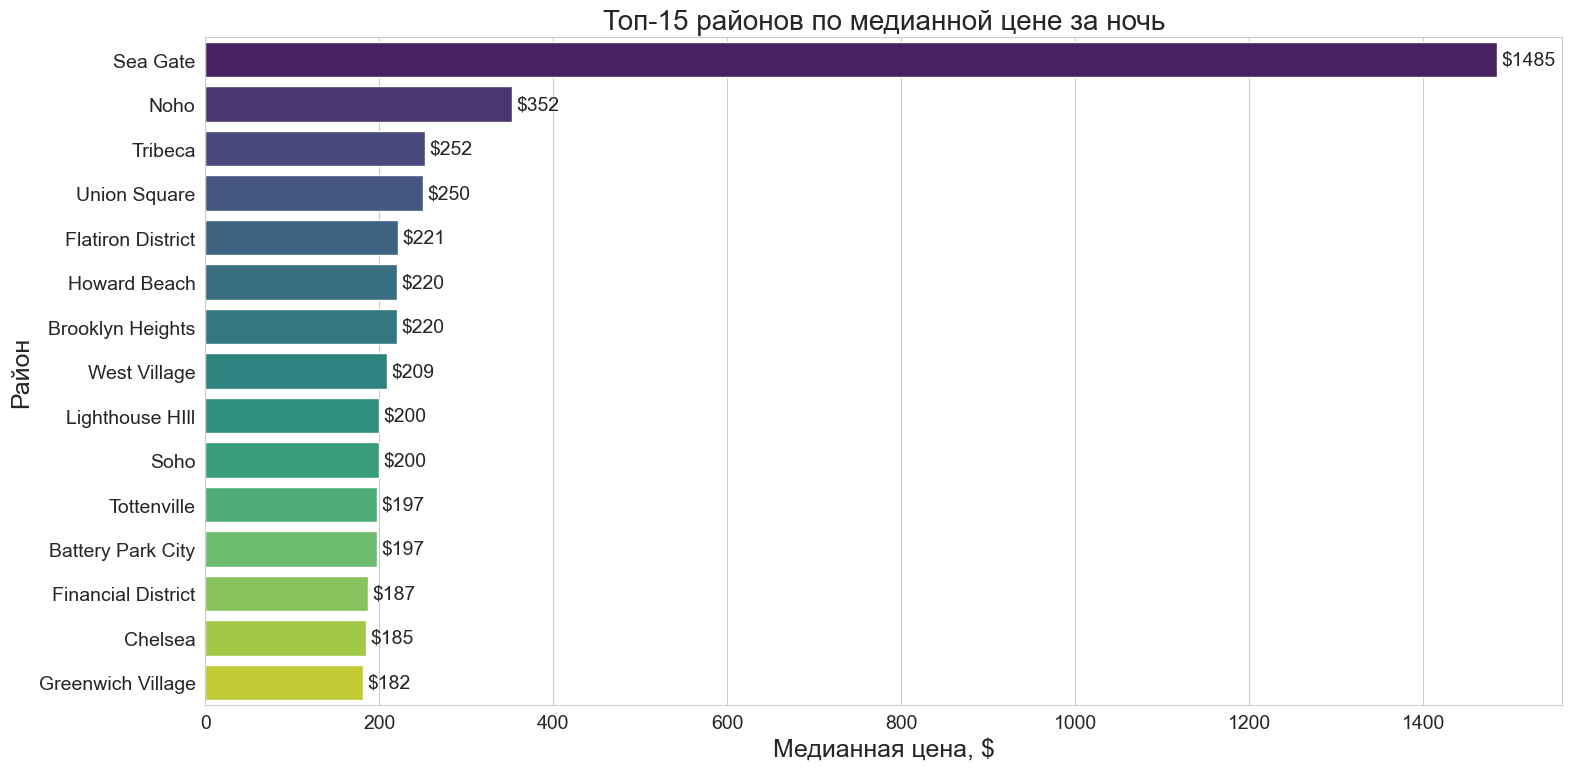

In [88]:
# Топ-15 районов по медианной цене
top_neigh = ny.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(15)

plt.figure(figsize=(16, 8))
sns.barplot(x=top_neigh.values, y=top_neigh.index, palette='viridis')
plt.title('Топ-15 районов по медианной цене за ночь')
plt.xlabel('Медианная цена, $')
plt.ylabel('Район')
for i, v in enumerate(top_neigh.values):
    plt.text(v + 5, i, f"${v:.0f}", va='center', fontsize=14)

plt.tight_layout()
plt.show()

## Предобработка текста отзывов

In [89]:
# Предобработка текста
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Добавлние самых частых и бесполезных слов
extra_stops = {"the", "and", "was", "were", "is", "are", "been", "it'", "it's", "place", "food", "nt"}
stop_words.update(extra_stops)

def clean_and_lemmatize_fast(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)         
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words 
             if w not in stop_words and len(w) > 2]
    return " ".join(words)

reviews['Review_clean'] = reviews['Review'].apply(clean_and_lemmatize_fast)

reviews[['Review', 'Review_clean', 'Liked']].head(10)

,Review,Review_clean,Liked
0,Wow... Loved this place.,wow loved,1
1,Crust is not good.,crust good,0
2,Not tasty and the texture was just nasty.,tasty texture nasty,0
3,Stopped by during the late May bank holiday of...,stopped late may bank holiday rick steve recom...,1
4,The selection on the menu was great and so wer...,selection menu great price,1
5,Now I am getting angry and I want my damn pho.,getting angry want damn pho,0
6,Honeslty it didn't taste THAT fresh.),honeslty didnt taste fresh,0
7,The potatoes were like rubber and you could te...,potato like rubber could tell made ahead time ...,0
8,The fries were great too.,fry great,1
9,A great touch.,great touch,1


In [90]:
# Векторизация текста с TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True,
    stop_words='english'
)

X_text = vectorizer.fit_transform(reviews['Review_clean'])
y_text = reviews['Liked']

print(f"Размер матрицы: {X_text.shape}")
print(f"Пример слов: {list(vectorizer.vocabulary_.keys())[:20]}")

Размер матрицы: (1000, 445)
Пример слов: ['wow', 'loved', 'good', 'tasty', 'texture', 'nasty', 'recommendation', 'selection', 'menu', 'great', 'price', 'getting', 'want', 'damn', 'pho', 'didnt', 'taste', 'fresh', 'potato', 'like']


In [91]:
# Бейзлайн классификация с KNN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

results = [] 

vec_simple = TfidfVectorizer()
X_clf = vec_simple.fit_transform(reviews['Review'])
y_clf = reviews['Liked']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

from sklearn.neighbors import KNeighborsClassifier
knn_clf_base = KNeighborsClassifier(n_neighbors=5)
knn_clf_base.fit(X_train_c, y_train_c)
pred_clf = knn_clf_base.predict(X_test_c)

acc_base = accuracy_score(y_test_c, pred_clf)
f1_base = f1_score(y_test_c, pred_clf)

print("baseline (KNN k=5)")
print(f"Accuracy: {acc_base:.4f}")
print(f"F1-score: {f1_base:.4f}")

results.append({'Задача': 'Классификация', 'Этап': 'Бейзлайн', 'Модель': 'KNN', 
                'Accuracy': acc_base, 'F1': f1_base})

baseline (KNN k=5)
Accuracy: 0.7750
F1-score: 0.7982


In [92]:
# Бейзлайн регрессия с KNN

features_reg = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'availability_2020', 'days_occupied_in_2019']
X_reg = ny[features_reg].fillna(0)
y_reg = ny['price']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsRegressor
knn_reg_base = KNeighborsRegressor(n_neighbors=11)
knn_reg_base.fit(X_train_r, y_train_r)
pred_reg = knn_reg_base.predict(X_test_r)

mae_base = mean_absolute_error(y_test_r, pred_reg)
rmse_base = np.sqrt(mean_squared_error(y_test_r, pred_reg))

print("\n baseline (KNN k=11)")
print(f"MAE:  {mae_base:.2f}")
print(f"RMSE: {rmse_base:.2f}")

results.append({'Задача': 'Регрессия', 'Этап': 'Бейзлайн', 'Модель': 'KNN', 
                'MAE': mae_base, 'RMSE': rmse_base})


 baseline (KNN k=11)
MAE:  84.70
RMSE: 186.89


In [93]:
# Улучшенная классификация с KNN и TF-IDF

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, sublinear_tf=True)
X_clf_imp = vectorizer.fit_transform(reviews['Review_clean'])

X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(
    X_clf_imp, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

knn_clf_imp = KNeighborsClassifier(n_neighbors=9, weights='distance', n_jobs=-1)
knn_clf_imp.fit(X_train_c2, y_train_c2)
pred_clf_imp = knn_clf_imp.predict(X_test_c2)

acc_imp = accuracy_score(y_test_c2, pred_clf_imp)
f1_imp = f1_score(y_test_c2, pred_clf_imp)

print(f"Accuracy: {acc_imp:.4f} (+{acc_imp-acc_base:.4f})")
print(f"F1:       {f1_imp:.4f} (+{f1_imp-f1_base:.4f})")

results.append({'Задача': 'Классификация', 'Этап': 'Улучшенный', 'Модель': 'KNN', 
                'Accuracy': acc_imp, 'F1': f1_imp})

Accuracy: 0.7600 (+-0.0150)
F1:       0.7949 (+-0.0033)


In [ ]:
# Улучшенная регрессия с KNN5

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Чистим выбросы и берём логарифм цены
df_reg = ny[(ny['price'] > 10) & (ny['price'] < 800)].copy()
df_reg['log_price'] = np.log1p(df_reg['price'])

times_square_lat = 40.7580
times_square_lon = -73.9855

df_reg['dist_to_center'] = np.sqrt(
    (df_reg['latitude'] - times_square_lat)**2 + 
    (df_reg['longitude'] - times_square_lon)**2
) * 111 # приблизительно в км

# Признаки
features_reg = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'availability_2020', 'days_occupied_in_2019', 'dist_to_center']

X_reg_imp = df_reg[features_reg].fillna(0)
y_reg_imp = df_reg['log_price']

X_train_r2, X_test_r2, y_train_r2, y_test_r2 = train_test_split(
    X_reg_imp, y_reg_imp, test_size=0.2, random_state=42
)

# Улучшенный KNN с масштабированием и weights='distance'
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=15, weights='distance', n_jobs=-1))
])

knn_pipe.fit(X_train_r2, y_train_r2)
pred_log = knn_pipe.predict(X_test_r2)
pred_price = np.expm1(pred_log)
true_price = np.expm1(y_test_r2)

mae_imp = mean_absolute_error(true_price, pred_price)
rmse_imp = np.sqrt(mean_squared_error(true_price, pred_price))

print(f"MAE:  {mae_imp:.2f}  ← было {mae_base:.2f}")
print(f"RMSE: {rmse_imp:.2f}")

# Добавляем в результаты
results.append({'Задача': 'Регрессия', 'Этап': 'Улучшенный', 'Модель': 'KNN', 
                'MAE': mae_imp, 'RMSE': rmse_imp})

MAE:  54.56  ← было 84.70
RMSE: 88.49


In [100]:
# мои классы KNN

from collections import Counter
from sklearn.metrics import accuracy_score, f1_score

class MyKNNClassifier:
    def __init__(self, k=9):
        self.k = k
    
    def fit(self, X_train, y_train):
        # Поддержка sparse (TF-IDF) и обычных массивов
        if hasattr(X_train, "toarray"):
            self.X_train = X_train.toarray()
        else:
            self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def predict(self, X_test):
        if hasattr(X_test, "toarray"):
            X_test_arr = X_test.toarray()
        else:
            X_test_arr = np.array(X_test)
        
        predictions = []
        for i in range(len(X_test_arr)):
            # Косинусное расстояние 
            norms_train = np.linalg.norm(self.X_train, axis=1)
            norms_test = np.linalg.norm(X_test_arr[i])
            if norms_test == 0 or np.any(norms_train == 0):
                cosine_dist = np.zeros(len(self.X_train))
            else:
                cosine_dist = np.dot(self.X_train, X_test_arr[i]) / (norms_train * norms_test)
            
            nearest_indices = np.argsort(-cosine_dist)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            
            # Голосование
            pred = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(pred)
        
        return np.array(predictions)

class MyKNNRegressor:
    def __init__(self, k=15):
        self.k = k
    
    def fit(self, X_train, y_train):
        if hasattr(X_train, "toarray"):
            self.X_train = X_train.toarray()
        else:
            self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def predict(self, X_test):
        if hasattr(X_test, "toarray"):
            X_test_arr = X_test.toarray()
        else:
            X_test_arr = np.array(X_test)
        
        predictions = []
        for i in range(len(X_test_arr)):
            distances = np.sqrt(((self.X_train - X_test_arr[i]) ** 2).sum(axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            
            if distances[nearest_indices[-1]] == 0:
                pred = self.y_train[nearest_indices].mean()
            else:
                weights = 1 / (distances[nearest_indices] + 1e-8)
                pred = np.average(self.y_train[nearest_indices], weights=weights)
            predictions.append(pred)
        
        return np.array(predictions)

In [101]:
# классификация с MyKNNClassifier

my_knn_clf = MyKNNClassifier(k=9)
my_knn_clf.fit(X_train_c2, y_train_c2)  # используем улучшенный TF-IDF
pred_my_clf = my_knn_clf.predict(X_test_c2)

acc_my = accuracy_score(y_test_c2, pred_my_clf)
f1_my = f1_score(y_test_c2, pred_my_clf)

print(f"Accuracy: {acc_my:.4f}")
print(f"F1-score: {f1_my:.4f}")

results.append({'Задача': 'Классификация', 'Этап': 'Своя имплементация', 'Модель': 'MyKNN', 
                'Accuracy': acc_my, 'F1': f1_my})

Accuracy: 0.5000
F1-score: 0.6667


In [ ]:
# регрессия с MyKNNRegressor
my_knn_reg = MyKNNRegressor(k=15)
my_knn_reg.fit(X_train_r2, y_train_r2)
pred_my_log = my_knn_reg.predict(X_test_r2)
pred_my_price = np.expm1(pred_my_log)

mae_my = mean_absolute_error(np.expm1(y_test_r2), pred_my_price)

print(f"MAE: {mae_my:.2f}")

results.append({'Задача': 'Регрессия', 'Этап': 'Своя имплементация', 'Модель': 'MyKNN', 
                'MAE': mae_my})

MAE: $62.20


In [103]:
# свой KNN + улучшения из пункта 3 (масштабирование, новые признаки)
from sklearn.preprocessing import StandardScaler

# Масштабируем признаки (как в улучшенном sklearn)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_r2)
X_test_scaled = scaler.transform(X_test_r2)

my_knn_imp = MyKNNRegressor(k=15)
my_knn_imp.fit(X_train_scaled, y_train_r2)
pred_my_imp = my_knn_imp.predict(X_test_scaled)
pred_price_imp = np.expm1(pred_my_imp)

mae_my_imp = mean_absolute_error(np.expm1(y_test_r2), pred_price_imp)

print(f" MAE: {mae_my_imp:.2f}")

results.append({'Задача': 'Регрессия', 'Этап': 'Своя + улучшения', 'Модель': 'MyKNN', 
                'MAE': mae_my_imp})

 MAE: 54.56


In [104]:
final_df = pd.DataFrame(results)

# Классификация
clf_df = final_df[final_df['Задача'] == 'Классификация'][['Этап', 'Модель', 'Accuracy', 'F1']]
clf_df = clf_df.round(4)

# Регрессия
reg_df = final_df[final_df['Задача'] == 'Регрессия'][['Этап', 'Модель', 'MAE']]
reg_df = reg_df.round(2)

print("классификация отзывов")
display(clf_df.style.background_gradient(cmap='Greens', subset=['Accuracy','F1']))

print("\nрегрессия цен на жильё")
display(reg_df.style.background_gradient(cmap='Blues', subset=['MAE']))

классификация отзывов


,Этап,Модель,Accuracy,F1
0,Бейзлайн,KNN,0.775000,0.798200
2,Улучшенный,KNN,0.760000,0.794900
4,Своя имплементация,MyKNN,0.775000,0.796400
7,Своя имплементация,MyKNN,0.500000,0.666700



регрессия цен на жильё


,Этап,Модель,MAE
1,Бейзлайн,KNN,84.700000
3,Улучшенный,KNN,54.560000
5,Своя имплементация,MyKNN,62.200000
6,Своя + улучшения,MyKNN,54.560000
8,Своя имплементация,MyKNN,62.200000
9,Своя + улучшения,MyKNN,54.560000
